# References
1.   https://mml-book.github.io/book/mml-book.pdf
2.   https://docs.pytorch.org/docs/stable/linalg.html

In [481]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# linear systems

In [482]:
A = torch.tensor([[5.,1.],[3.,-4.]])
b = torch.tensor([[8.,14.]])

In [483]:
A.size(), b.size()

(torch.Size([2, 2]), torch.Size([1, 2]))

In [484]:
inverse = 1/torch.linalg.det(A)*torch.tensor([[-4.,-1.],[-3.,5.]])
inverse

tensor([[ 0.1739,  0.0435],
        [ 0.1304, -0.2174]])

In [485]:
A @ inverse

tensor([[1., 0.],
        [0., 1.]])

In [486]:
# to solve the linear system Ax = b --> x = b@A^-1
x = inverse@b.T
x

tensor([[ 2.0000],
        [-2.0000]])

In [487]:
A@x # as we can see now we found x such that x @ A gives b

tensor([[ 8.0000],
        [14.0000]])

In [488]:
# using pytorch
torch.linalg.solve(A, b.T)

tensor([[ 2.],
        [-2.]])

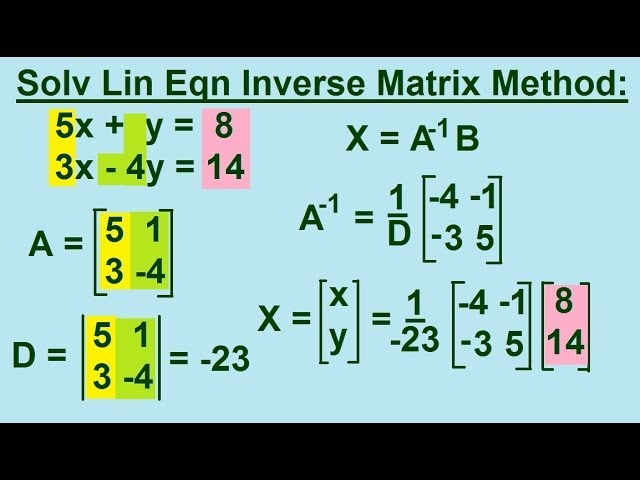

## what happens if the matrix is not square? (chptr 2.3)

In [489]:
# the type of solution we saw before can be used if and only if the matrix is square and INVERTIBLE
# the following is a overdetermined system (more equations than variables)

In [490]:
A = torch.tensor([[1., 2.],
                  [3., 4.],
                  [5., 6.]])
b = torch.tensor([7., 8., 9.]).reshape(-1,1)
try:
  torch.linalg.det(A)
except Exception as e:
  print(e)


linalg.det: A must be batches of square matrices, but they are 3 by 2 matrices


In [491]:
# to solve this issue we have to make the matrix squared by multiplying both terms by A.T
# Ax=b --> (A.T @ A) @ x = A.T @ b
A.T @ A

tensor([[35., 44.],
        [44., 56.]])

In [492]:
# now we can solve the system by multiplying both terms by (A.T @ A)^-1
# Ax=b --> (A.T @ A) @ x = A.T @ b --> multiply both terms by (A.T @ A)^-1 = torch.linalg.inv(A.T@A) -> x (A.T @ A)^-1 @ A.T
# we obtain x as:
torch.linalg.inv(A.T@A)@A.T # multiply by b and we found x, --> THIS IS ALSO KNOWN AS PSEUDO INVERSE

tensor([[-1.3333, -0.3333,  0.6667],
        [ 1.0833,  0.3333, -0.4167]])

In [493]:
x = torch.linalg.inv(A.T@A)@A.T @ b
x

tensor([[-6.0000],
        [ 6.5000]])

In [494]:
x = torch.linalg.inv(A.T @ A) @ A.T @ b


In [495]:
A@x


tensor([[7.0000],
        [7.9999],
        [8.9999]])

In [496]:
# to calculate the pseudo inverse we can use pytorch
torch.linalg.pinv(A)

tensor([[-1.3333, -0.3333,  0.6667],
        [ 1.0833,  0.3333, -0.4167]])

In [497]:
torch.allclose(torch.linalg.pinv(A), torch.linalg.inv(A.T@A)@A.T, atol = 10e-5)

True

# Matrix transformations

In [498]:
square = torch.tensor([[0,0],[1,0],[0,1],[1,1]])
square

tensor([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]])

In [499]:
x, y = zip(*square)

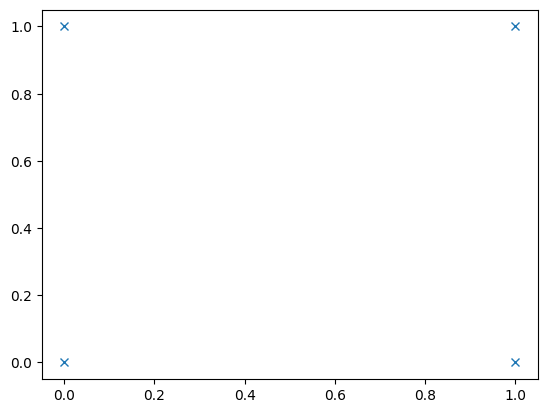

In [500]:
plt.plot(x,y, "x")

In [501]:
n = 10
number  = 10

In [502]:
x = torch.tensor(np.linspace(0,n,number+1))
y = torch.tensor(np.linspace(0,n,number+1))
grid_x, grid_y = torch.meshgrid(x, y, indexing='ij')


In [503]:
torch.meshgrid(x, y)
# creates 2 matrices, the one for the xs' and the one for the corresponding ys'
# so that we have (0,0), (0,1), (0,2)... (10,8), (10,9), (10,10).

(tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
         [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
         [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
         [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
         [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
         [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
         [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
         [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
         [ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.],
         [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]],
        dtype=torch.float64),
 tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 0.,  1.,  2.,  3.,  4.,  5.,  6., 

In [504]:
torch.stack([grid_x, grid_y],dim = 0).size()

torch.Size([2, 11, 11])

In [505]:
torch.stack([grid_x, grid_y], dim = 1).size()

torch.Size([11, 2, 11])

In [506]:
torch.stack([grid_x, grid_y],dim = 2).size()

torch.Size([11, 11, 2])

In [507]:
coords_row_ = torch.stack([grid_x, grid_y], dim=-1)
coords_row_ # this way we have 11 lists, each with eleven 2-dimensional vectorsv (coordinates)

tensor([[[ 0.,  0.],
         [ 0.,  1.],
         [ 0.,  2.],
         [ 0.,  3.],
         [ 0.,  4.],
         [ 0.,  5.],
         [ 0.,  6.],
         [ 0.,  7.],
         [ 0.,  8.],
         [ 0.,  9.],
         [ 0., 10.]],

        [[ 1.,  0.],
         [ 1.,  1.],
         [ 1.,  2.],
         [ 1.,  3.],
         [ 1.,  4.],
         [ 1.,  5.],
         [ 1.,  6.],
         [ 1.,  7.],
         [ 1.,  8.],
         [ 1.,  9.],
         [ 1., 10.]],

        [[ 2.,  0.],
         [ 2.,  1.],
         [ 2.,  2.],
         [ 2.,  3.],
         [ 2.,  4.],
         [ 2.,  5.],
         [ 2.,  6.],
         [ 2.,  7.],
         [ 2.,  8.],
         [ 2.,  9.],
         [ 2., 10.]],

        [[ 3.,  0.],
         [ 3.,  1.],
         [ 3.,  2.],
         [ 3.,  3.],
         [ 3.,  4.],
         [ 3.,  5.],
         [ 3.,  6.],
         [ 3.,  7.],
         [ 3.,  8.],
         [ 3.,  9.],
         [ 3., 10.]],

        [[ 4.,  0.],
         [ 4.,  1.],
         [ 4.,  2.],
     

In [508]:
coords_row = coords_row_.view(121, 2) # we want to have a 121 (11*11) list of 2 dimensional vectors

In [509]:
grid_x,grid_y = zip(*coords_row) # now we assign to grid_x the first value of each one of the 121 2 dimensioal vectors and the second one to grid_y


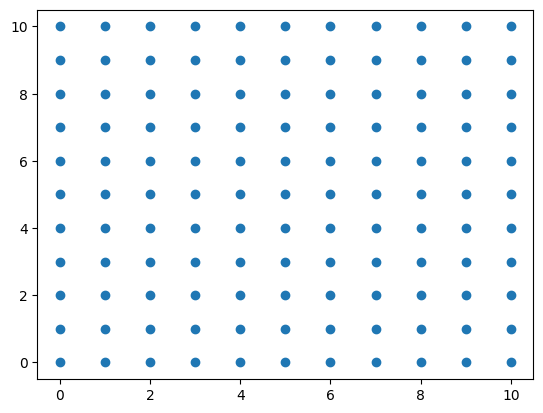

In [510]:
plt.plot(grid_x,grid_y, "o")
plt.show()

In [511]:
transformation_matrix = torch.tensor([[3,-1],[1,-1]], dtype = torch.float64)
rotation_matrix = torch.tensor([[torch.cos(torch.tensor(torch.pi/4)),-torch.sin(torch.tensor(torch.pi/4))],[torch.sin(torch.tensor(torch.pi/4)),torch.cos(torch.tensor(torch.pi/4))]], dtype = torch.float64)

In [512]:
transformation_result = coords_row @ rotation_matrix

In [513]:
x, y = zip(*transformation_result)

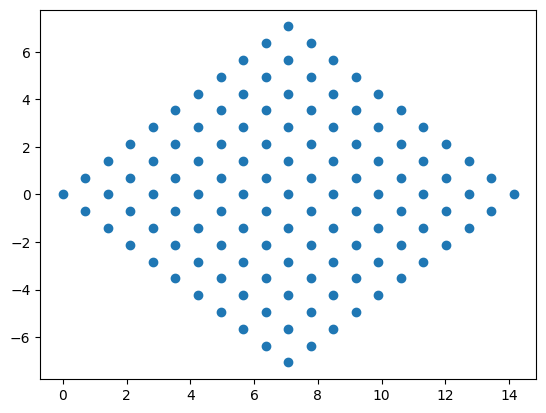

In [514]:
plt.plot(x,y, "o")

## symmetric matrices

In [515]:
A = torch.tensor([[9,6],[6,3]])
A

tensor([[9, 6],
        [6, 3]])

In [516]:
A.T

tensor([[9, 6],
        [6, 3]])

In [517]:
(A.T == A).all()

tensor(True)

# Inner product

In [518]:
x = torch.tensor([1.,1.]).T

In [519]:
torch.norm(x)

tensor(1.4142)

In [520]:
A_identity = torch.eye(2)
A_identity

tensor([[1., 0.],
        [0., 1.]])

In [521]:
norm_dot_product_squared = x.T @ A_identity @ x
norm_dot_product = norm_dot_product_squared**0.5
norm_dot_product

tensor(1.4142)

In [522]:
A = torch.tensor([[1.0,-0.5],[-0.5,1.0]])
norm_inner_product_squared = x.T @ A @ x
norm_dot_product = norm_inner_product_squared**0.5
norm_dot_product

tensor(1.)

In [523]:
# as long as the matrix is symmetric
A.T == A
# and the quadratic form is always greater than zero (positive definite)

tensor([[True, True],
        [True, True]])

In [524]:
A2 = torch.tensor([[9,6], [6,3]])

In [525]:
A2.T==A2 # symmetric but not positive definite

tensor([[True, True],
        [True, True]])

## angles and inner product

In [526]:
x = torch.tensor([1.0,2.0])
y = torch.tensor([1.0,1.0])

In [527]:
def distance(x: torch.Tensor, y: torch.Tensor, A: torch.Tensor) -> torch.Tensor:
    """
    Compute the A-metric distance between two vectors.
    If A = I (identity), this reduces to the Euclidean distance.
    """
    diff = x - y
    norm_inner_product_squared = diff.T @ A @ diff
    return torch.sqrt(norm_inner_product_squared)


def inner_product_A(x: torch.Tensor, y: torch.Tensor, A: torch.Tensor) -> torch.Tensor:
    """
    Compute the A-inner product between two vectors.
    If A = I (identity), this reduces to the standard dot product x^T y.
    """
    norm_inner_product_squared = x.T @ A @ y
    return norm_inner_product_squared


def norm(x: torch.Tensor, A: torch.Tensor) -> torch.Tensor:
    """
    Compute the A-quadratic form of a vector (squared A-norm).
    To get the A-norm itself, take torch.sqrt(norm(x, A)).
    If A = I (identity), this returns the squared Euclidean norm.
    """
    norm_inner_product_squared = x.T @ A @ x
    return torch.sqrt(norm_inner_product_squared)


def check_orthogonality(x: torch.Tensor, y: torch.Tensor, A: torch.Tensor = torch.eye(len(x)),atol=1e-8) -> torch.Tensor:
    """
    Check if two vectors are A-orthogonal.
    """
    val = inner_product_A(x, y, A)
    return torch.isclose(val, torch.tensor(0.0, dtype=val.dtype), atol=atol).item()


def check_spd(A):
  """
  check if matrix is symmetric positive definite
  """
  pass



In [528]:
distance(x,y, torch.eye(2))

tensor(1.)

In [529]:
norm_x = norm(x, torch.eye(2))
norm_y = norm(y, torch.eye(2))
inner_product_A_ = inner_product_A(x,y, torch.eye(2))

In [530]:
cosine_similarity = inner_product_A_/(norm_x*norm_y)
cosine_similarity

tensor(0.9487)

In [531]:

angle_radians = torch.acos(cosine_similarity)
angle_radians

tensor(0.3218)

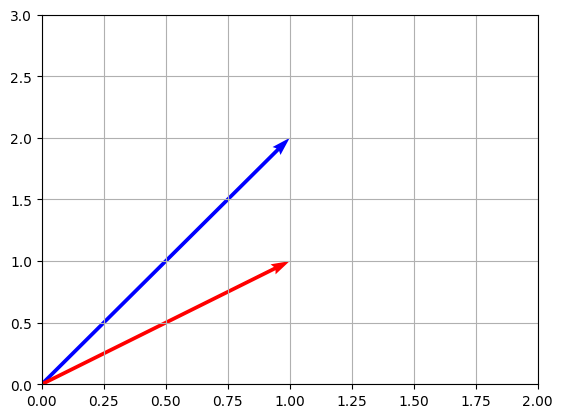

In [532]:
fig, ax = plt.subplots()

ax.quiver(0, 0, *x, angles='xy', scale_units='xy', scale=1, color='b')
ax.quiver(0, 0, *y, angles='xy', scale_units='xy', scale=1, color='r')

# Set the limits and aspect ratio for a clear plot
ax.set_xlim(0, max(x[0], y[0]) + 1)
ax.set_ylim(0, max(x[1], y[1]) + 1)

ax.grid()

plt.show()

In [533]:
x = torch.tensor([1.0,0.0])
y = torch.tensor([0.0,1.0])
check_orthogonality(x,y)

True

In [534]:
check_orthogonality(x,y, A = torch.tensor([[9.0,6.0],[6.0,5.0]]))

False

In [535]:
x = torch.tensor([1.0,1.0])
y = torch.tensor([-1.0,1.0])

In [536]:

norm_x = norm(x, torch.eye(2))
norm_y = norm(y, torch.eye(2))
inner_product_A_ = inner_product_A(x,y, torch.eye(2))

In [537]:
alpha = inner_product_A_/(norm_x*norm_y)
torch.acos(alpha)/(2*torch.pi)*360
# orthogonal

tensor(90.)

In [538]:
A = torch.tensor([[2.0,0.0],[0.0,1.0]])

norm_x = norm(x, A)
norm_y = norm(y, A)
inner_product_A_ = inner_product_A(x,y, A)


alpha = inner_product_A_/(norm_x*norm_y)
torch.acos(alpha)/(2*torch.pi)*360
# same vectors but different A matrix, not orthogonal

tensor(109.4712)

In [539]:
# orthogonal matrix
Q = torch.tensor([[0., -1.],
     [1.,  0.]])

In [540]:
Q@Q.T

tensor([[1., 0.],
        [0., 1.]])

In [541]:
torch.allclose(Q@Q.T, torch.eye(2))

True

In [542]:
x_q = Q@x
y_q = Q@y
A = torch.eye(2)

In [543]:
# orthogonal matrices preserve angles and distances

norm_x = norm(x_q, A)
norm_y = norm(y_q, A)
inner_product_A_ = inner_product_A(x_q,y_q, A)


alpha = inner_product_A_/(norm_x*norm_y)
torch.acos(alpha)/(2*torch.pi)*360

tensor(90.)

## orthonormal basis

In [544]:
b1 = 1/(2**0.5) * torch.tensor([1,1])
b2 = 1/(2**0.5) * torch.tensor([1,-1])


In [545]:
norm(b1,torch.eye(2))

tensor(1.0000)

In [546]:
norm(b2,torch.eye(2))

tensor(1.0000)

In [547]:
b1.T@b2

tensor(0.)

In [548]:
def show_vectors(*args: torch.tensor,zoom=1, color_map = None):
  fig, ax = plt.subplots()
  if not color_map:
    color_map = ["b"]*len(args)
  for c,vec in zip(color_map, args):
    ax.quiver(0, 0, *vec, angles='xy', scale_units='xy', scale=1, color=c)
  x_lim = max([vec[0].item() for vec in args])
  y_lim = max([vec[1].item() for vec in args])
  ax.set_ylim(-y_lim-zoom,y_lim+zoom)
  ax.set_xlim(-x_lim-zoom,x_lim+zoom)
  ax.grid()
  plt.show()

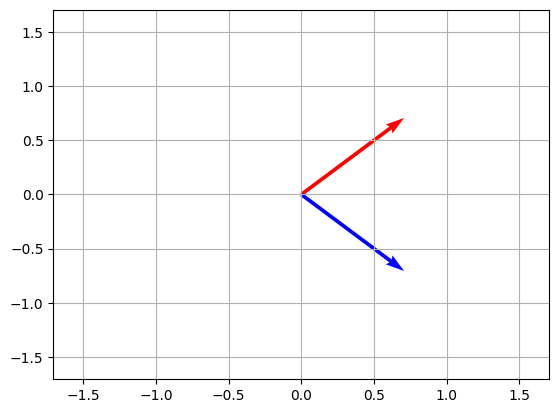

In [549]:
show_vectors(b1,b2 , color_map = ["r", "b"])

# Projections

## projections to 1d plane (from R^n to a line)

## example 1 [2d -> 1d]

In [550]:
# project from 2d to 1d

lambda_ = torch.zeros(1,1, dtype = torch.float32) # scalar value multiplied to b to obtain the projection
projection =  torch.zeros(1,2,dtype = torch.float32) # projection
projection_matrix =  torch.zeros(2,2,dtype = torch.float32) # projection matrix

In [551]:
x = torch.tensor([2.,3.]) # vector to project onto the subspace
b = torch.tensor([[1.,1.]]).T # basis for the subspace we want to project onto, in this case this is a line that passes through the origin (very important condition for any subspaces, with closure to math mult and scalar mult)

# b = (1,1) means  y = x

In [552]:
lambda_ = (b.T@x)/norm(b, torch.eye(2))**2
lambda_

tensor([[2.5000]])

In [553]:
projection = (b.T@x)/(norm(b, torch.eye(2))**2)*b
projection

tensor([[2.5000],
        [2.5000]])

In [554]:
projection_matrix = (b@b.T)/(norm(b, torch.eye(2))**2)


In [555]:
projection_matrix

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])

In [556]:
projected = torch.tensor([2.,3.]) @ projection_matrix

In [557]:
lambda_*b

tensor([[2.5000],
        [2.5000]])

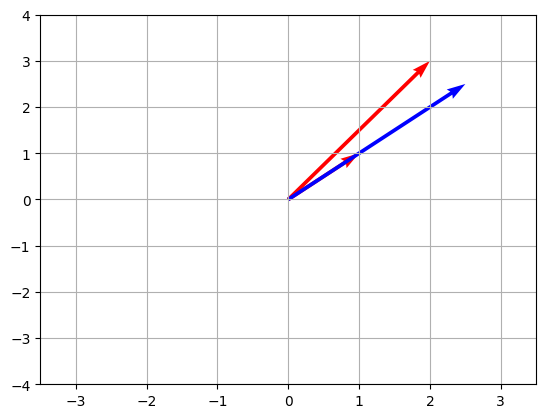

In [558]:
show_vectors(b, x, projected, color_map = ["r","r", "b"])

## example 2   [3d -> 1d]

In [559]:
b = torch.tensor([[1.,2.,2.]]).T # another example

In [560]:
b.shape

torch.Size([3, 1])

In [561]:
projection_matrix = (b@b.T)/(norm(b, torch.eye(3))**2)
projection_matrix



tensor([[0.1111, 0.2222, 0.2222],
        [0.2222, 0.4444, 0.4444],
        [0.2222, 0.4444, 0.4444]])

### important property of projections

In [562]:
projection_matrix@projection_matrix # applying 2 times the same matrix, gives the same result!! this is an important property of projection matrices

tensor([[0.1111, 0.2222, 0.2222],
        [0.2222, 0.4444, 0.4444],
        [0.2222, 0.4444, 0.4444]])

In [563]:
(projection_matrix@projection_matrix).allclose(projection_matrix@projection_matrix, rtol = 10e-10) # P^2 = P

True

In [564]:
x = torch.tensor([1.,1.,1.])

In [565]:
projected = x@projection_matrix # value of the projected vector x onto the line
projected

tensor([0.5556, 1.1111, 1.1111])

In [566]:
lambda_ = (b.T@x)/norm(b, torch.eye(3))**2
lambda_

tensor([[0.5556]])

In [567]:
lambda_*b # lambda is the value that multiplied by the base of the subspace give you the projection.

tensor([[0.5556],
        [1.1111],
        [1.1111]])

## example 3 [projection onto the x-axis]

In [568]:
# let's project onto the x axis

In [569]:
x = torch.tensor([2.,3.]) # vector to project onto the subspace
b = torch.tensor([[1.,0.]]).T # basis for the subspace we want to project onto, in this case this is a line that passes through the origin (very important condition for any subspaces, with closure to math mult and scalar mult)

In [570]:
lambda_ = (b.T@x)/norm(b, torch.eye(2))**2
lambda_

tensor([[2.]])

In [571]:
projection = (b.T@x)/(norm(b, torch.eye(2))**2)*b
projection

tensor([[2.],
        [0.]])

In [572]:
projection_matrix = (b@b.T)/(norm(b, torch.eye(2))**2)
projection_matrix

tensor([[1., 0.],
        [0., 0.]])

In [573]:
projected = torch.tensor([2.,3.]) @ projection_matrix
projected

tensor([2., 0.])

In [574]:
lambda_*b

tensor([[2.],
        [0.]])

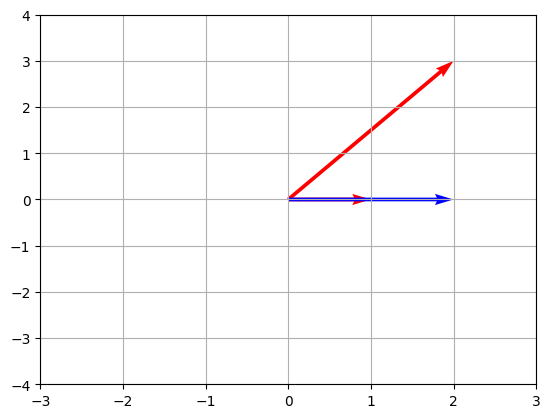

In [575]:
show_vectors(b, x,projected, color_map = ["r","r", "b"])

## utils

In [576]:
calculate_projection_matrix = lambda b: (b@b.T)/(norm(b, torch.eye(len(b)))**2)
calculate_lambda = lambda b, x : (b.T@x)/norm(b, torch.eye(len(b)))**2
calculate_projection = lambda b,x: (b.T@x)/(norm(b, torch.eye(len(b)))**2)*b


In [577]:
x = torch.tensor([2.,3.,4.])
b = torch.tensor([[0.,1.,0.]]).T
x, b

(tensor([2., 3., 4.]),
 tensor([[0.],
         [1.],
         [0.]]))

In [578]:
calculate_projection_matrix(b)

tensor([[0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]])

In [579]:
calculate_lambda(b,x)

tensor([[3.]])

In [580]:
calculate_projection(b,x)

tensor([[0.],
        [3.],
        [0.]])

In [581]:
projected = x @ calculate_projection_matrix(b)
projected

tensor([0., 3., 0.])

## generalized projection (dim(U)>1 where U is a subspace of R^n)

### project to 2 dimensions (example 3.11)

In [582]:
x = torch.tensor([[6.,0.,0.]]).T

In [583]:
B = torch.tensor([[1.,1.,1.],[0.,1.,2.]]).T # we have to basis, meaning 2 dimnesions

In [584]:
B

tensor([[1., 0.],
        [1., 1.],
        [1., 2.]])

In [585]:
B.T@B

tensor([[3., 3.],
        [3., 5.]])

In [586]:
B.T@x

tensor([[6.],
        [0.]])

In [587]:
# to find lambda we have to solve the following linear system of equations:
#  B.T@B @ [lambda1, lambda2] = B.T@x


In [588]:
lambdas_ = torch.linalg.solve(B.T@B, B.T@x)
lambdas_

tensor([[ 5.],
        [-3.]])

In [589]:
# or we can just calcualte the inverse
lambdas_ = torch.linalg.inv(B.T@B)@B.T@x
lambdas_

tensor([[ 5.],
        [-3.]])

In [590]:
projections = B@lambdas_
projections

tensor([[ 5.],
        [ 2.],
        [-1.]])

In [591]:
projection_matrix = B@torch.linalg.inv(B.T@B)@B.T
projection_matrix

tensor([[ 0.8333,  0.3333, -0.1667],
        [ 0.3333,  0.3333,  0.3333],
        [-0.1667,  0.3333,  0.8333]])

In [592]:
projection_matrix*6

tensor([[ 5.0000,  2.0000, -1.0000],
        [ 2.0000,  2.0000,  2.0000],
        [-1.0000,  2.0000,  5.0000]])

In [593]:
projection_matrix@x

tensor([[ 5.0000],
        [ 2.0000],
        [-1.0000]])

# Rotations

In [594]:
alpha = torch.deg2rad(torch.tensor(30))
R = torch.tensor([[torch.cos(alpha), -torch.sin(alpha)],[torch.sin(alpha), torch.cos(alpha)]])
R,alpha

(tensor([[ 0.8660, -0.5000],
         [ 0.5000,  0.8660]]),
 tensor(0.5236))

In [595]:
test = torch.tensor([1.,2.])
rotated_vector = test@R
rotated_vector

tensor([1.8660, 1.2321])

In [596]:
bx, by = torch.tensor([0.,1.]), torch.tensor([1.,0.])

In [597]:
rotated_bx, rotated_by = torch.tensor([0.,1.])@R, torch.tensor([1.,0.])@R

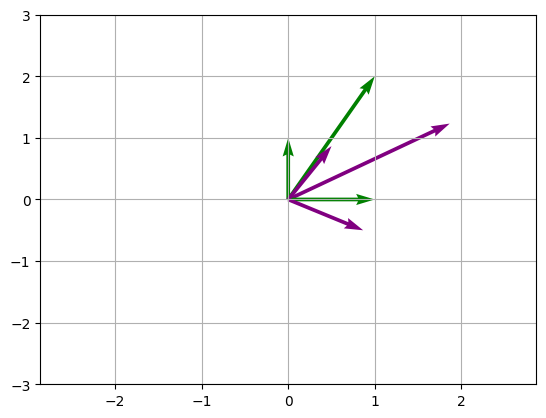

In [598]:
show_vectors(test,rotated_vector,bx, by,rotated_bx, rotated_by,color_map = ["green","purple","green","green", "purple","purple"], zoom = 1)

In [599]:
x = torch.tensor(np.linspace(0,10,11), dtype = torch.float32)
y = torch.tensor(np.linspace(0,10,11),dtype = torch.float32)

In [600]:
coords = torch.stack(torch.meshgrid(x,y),-1).view(121,2)
grid_x,grid_y = zip(*coords)


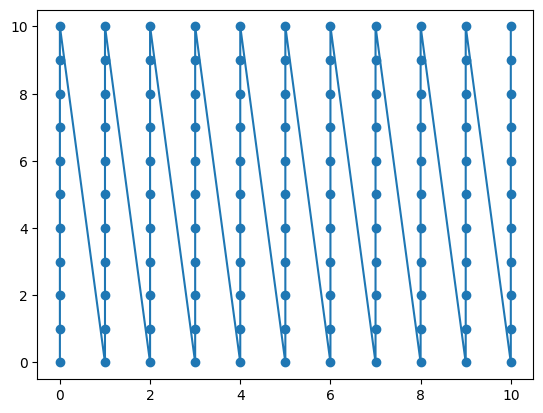

In [601]:
plt.plot(grid_x,grid_y, "o-")
plt.show()

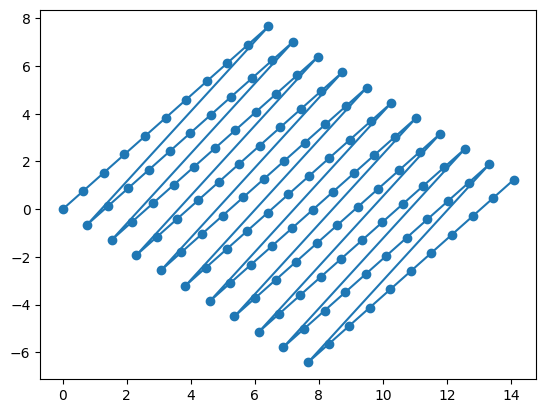

In [602]:
alpha = torch.deg2rad(torch.tensor(40))
R = torch.tensor([[torch.cos(alpha), -torch.sin(alpha)],[torch.sin(alpha), torch.cos(alpha)]])
R,alpha
coords_row_rotated = torch.stack(torch.meshgrid(x,y),-1)@R
coords_row_rotated = coords_row_rotated.view(121,2)
grid_x,grid_y = zip(*coords_row_rotated)
plt.plot(grid_x,grid_y, "o-")
plt.show()

## exercises

In [603]:
distance(torch.tensor([1,2,3], dtype = torch.float32), torch.tensor([-1,-1,0],dtype = torch.float32), torch.eye(3))

tensor(4.6904)

In [604]:
distance(torch.tensor([1,2,3], dtype = torch.float32), torch.tensor([-1,-1,0],dtype = torch.float32), torch.tensor([[2,1,0],[1,3,-1],[0,-1,2]], dtype = torch.float32))

tensor(6.8557)

# Matrix Decomposition

In [605]:
# given a square nxn matrix A, it is invertible if and only if the determinant is not zero, determinant is not zero if and only if the matrix is full rank (rank(A) = n)

In [606]:
A = torch.tensor([[1,2,3],[2,4,6],[0,4,1]], dtype = torch.float32)

In [607]:
torch.allclose(torch.linalg.det(A), torch.tensor(0.),atol=1e-5)

# atol (absolute tolerance): how close the numbers can be in absolute terms. Important when comparing to zero.
# rtol (relative tolerance): how close they can be relative to the size of b

True

In [608]:
torch.linalg.inv(A)

tensor([[ 2.7962e+07, -1.3981e+07, -5.0000e-01],
        [ 2.7962e+06, -1.3981e+06,  2.5000e-01],
        [-1.1185e+07,  5.5924e+06,  0.0000e+00]])

In [609]:
n = A.shape[0]
torch.linalg.matrix_rank(A)<n

tensor(True)

In [610]:
trace = lambda M: sum([M[i][i] for i in range(M.size()[-1])])

In [611]:
trace(torch.eye(10))

tensor(10.)

In [612]:
A = torch.tensor([[1,2,3],[2,3,4]],dtype = torch.float32) #2x3
K = torch.tensor([[1,2,4,5],[3,4,3,5], [3,1,2,3]],dtype = torch.float32) #3x4
L = torch.tensor([[2,3],[1,2],[4,5],[3,5]],dtype = torch.float32) # 4x2

# invariant to cyclic transformations

In [613]:
trace(A@K@L)

tensor(600.)

In [614]:
trace(K@L@A)

tensor(600.)

In [615]:
x = torch.tensor([[1,3,2]])
y = torch.tensor([[3,4,2]])

trace(x@y.T) == trace(y@x.T)

tensor(True)

## eigen vectors and eigen values

In [616]:
x = torch.tensor([[1,2]], dtype = torch.float32)

In [617]:
torch.allclose(x@torch.eye(2),x)

True

In [618]:
A = torch.tensor([[4,2],[1,3]])
x = torch.tensor([[3,4]]).T
x

tensor([[3],
        [4]])

In [619]:
A@x

tensor([[20],
        [15]])

In [620]:
eigen_value = 5

In [622]:
eigen_value*x

tensor([[15],
        [20]])